In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "ignite"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 56
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,0,1,0.357143,0.416667,0.384615,0.792775,0.629857,0.298418,0.952128,base
1,ignite,0,2,0.157895,0.157895,0.157895,0.640884,0.379391,0.164947,0.911602,base
2,ignite,0,3,0.466667,0.350000,0.400000,0.827917,0.578312,0.457070,0.955556,base
3,ignite,0,4,0.428571,0.150000,0.222222,0.774444,0.382971,0.328194,0.977778,base
4,ignite,0,5,0.333333,0.272727,0.300000,0.724868,0.513877,0.281684,0.968254,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,15,16,0.650000,0.325000,0.433333,0.849375,0.557478,0.647345,0.956250,ecoselekt
1,ignite,15,17,0.666667,0.518519,0.583333,0.891030,0.705364,0.578377,0.959538,ecoselekt
2,ignite,15,18,0.593750,0.655172,0.622951,0.900686,0.778051,0.690333,0.923977,ecoselekt
3,ignite,15,19,0.593750,0.513514,0.550725,0.866937,0.687429,0.623974,0.920245,ecoselekt
4,ignite,15,20,0.586207,0.472222,0.523077,0.812923,0.661566,0.554527,0.926829,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,ignite,15,16,0.650000,0.325000,0.433333,0.849375,0.557478,0.647345,0.956250,best
1,ignite,15,17,0.666667,0.518519,0.583333,0.891030,0.705364,0.578377,0.959538,best
2,ignite,15,18,0.593750,0.655172,0.622951,0.900686,0.778051,0.690333,0.923977,best
3,ignite,15,19,0.593750,0.513514,0.550725,0.866937,0.687429,0.623974,0.920245,best
4,ignite,15,20,0.586207,0.472222,0.523077,0.812923,0.661566,0.554527,0.926829,best


(1640, 11)


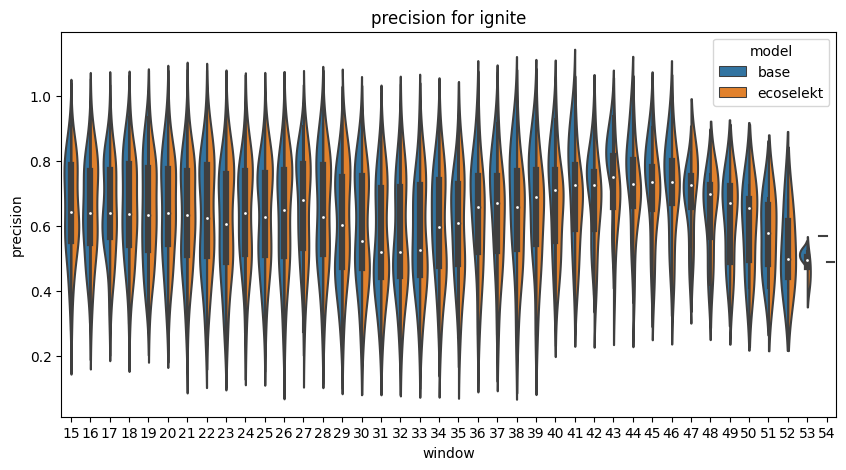

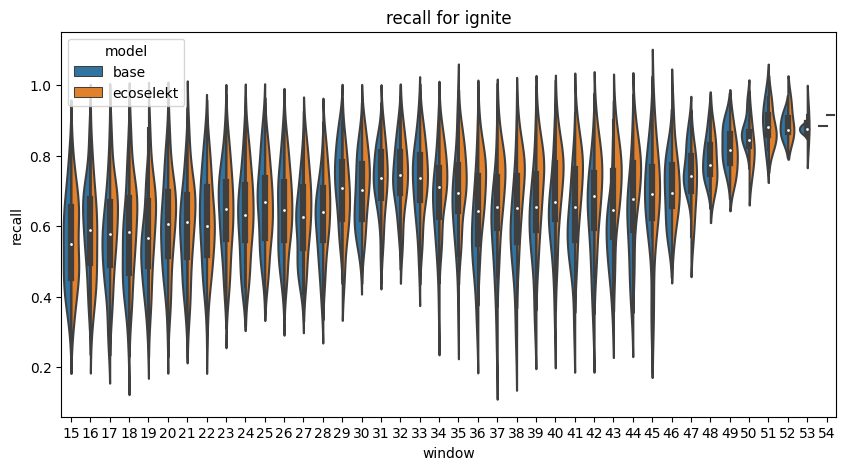

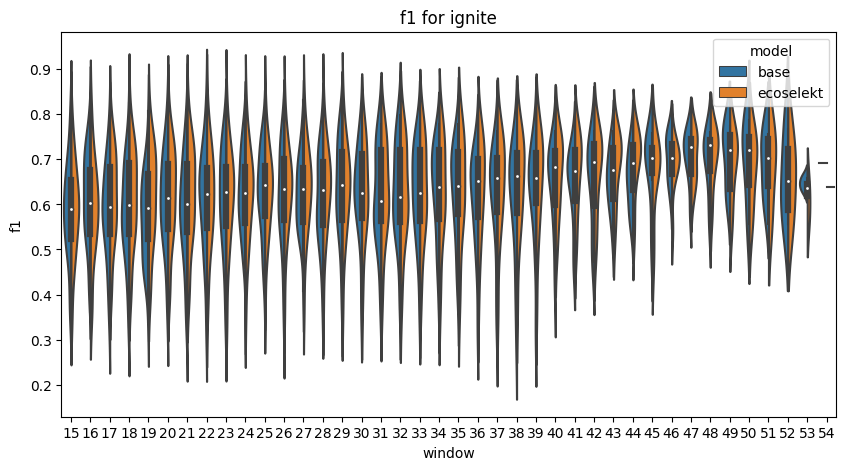

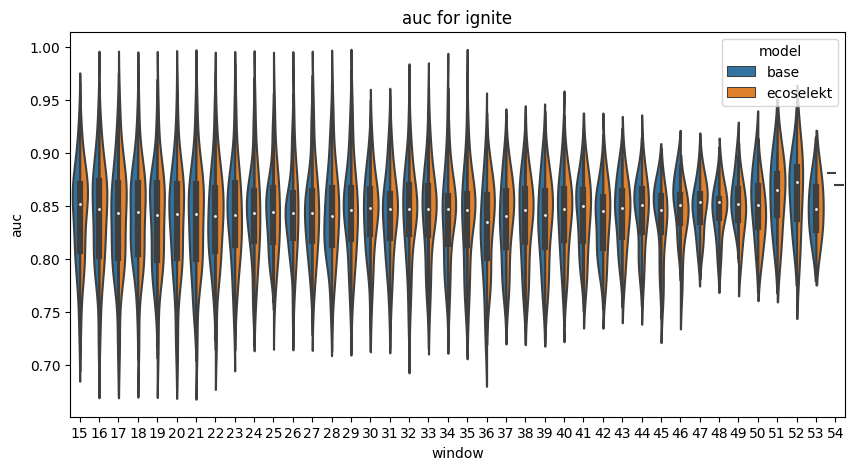

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


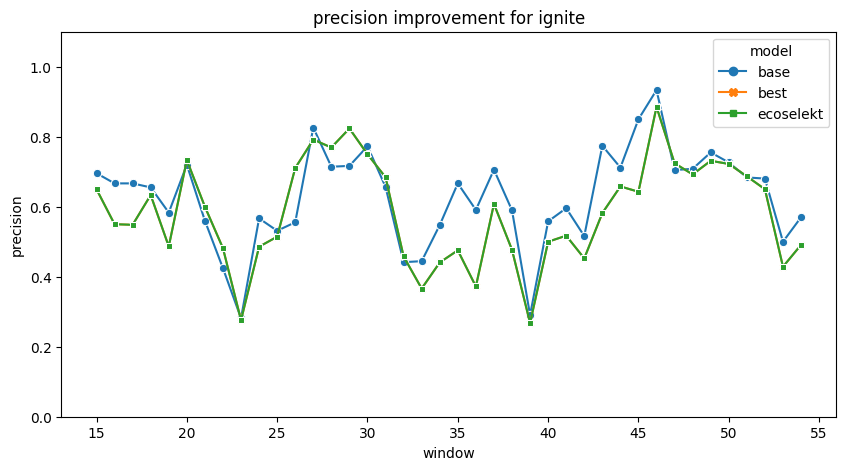

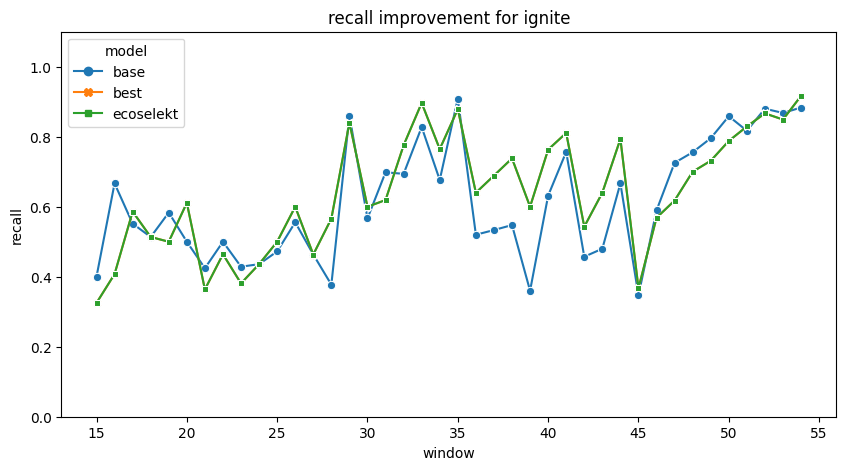

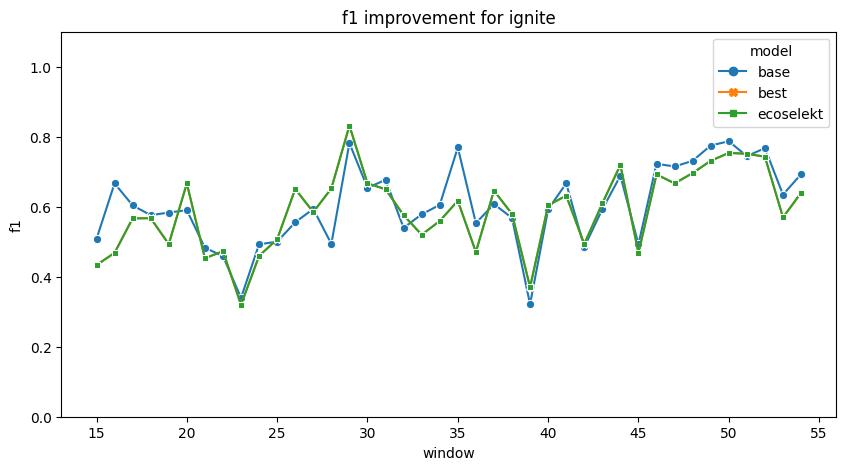

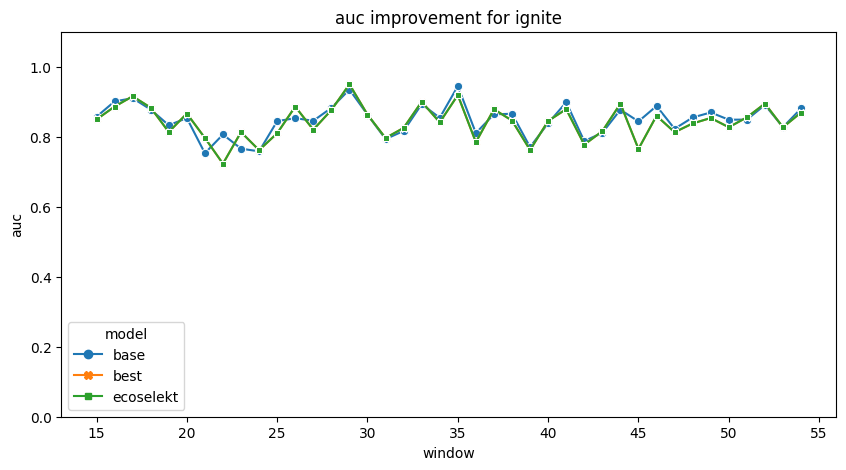

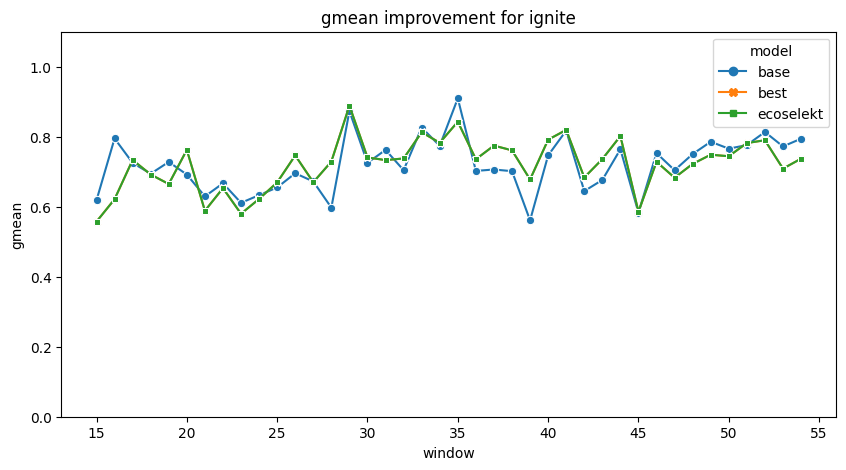

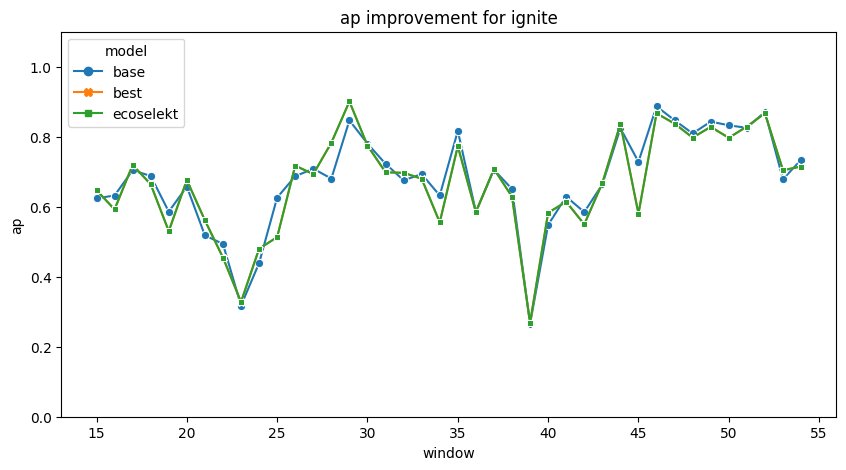

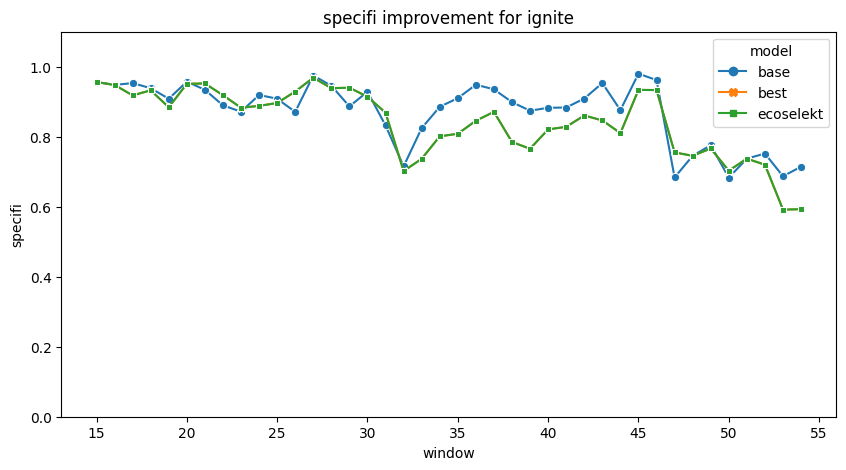

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

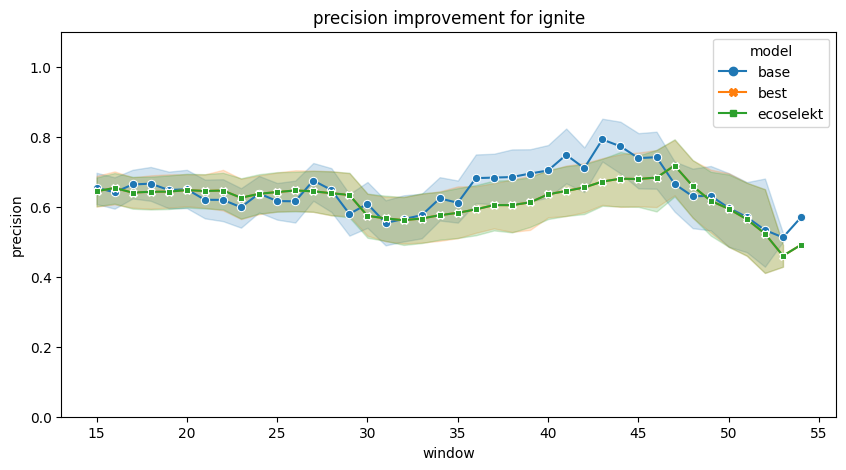

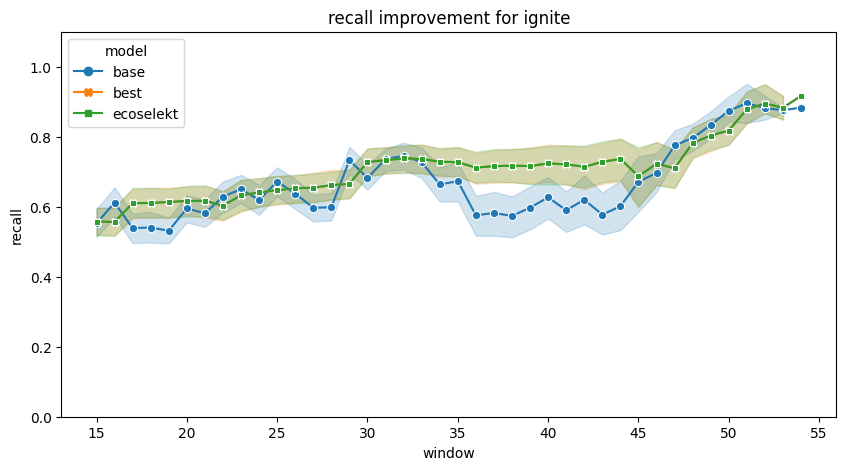

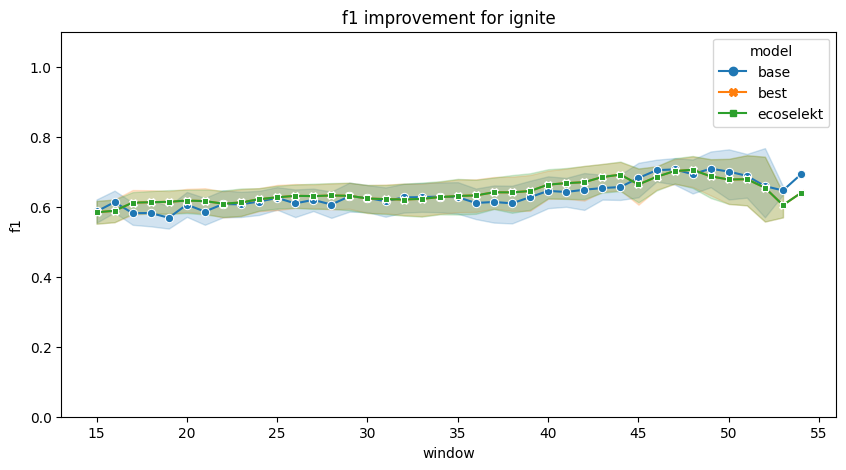

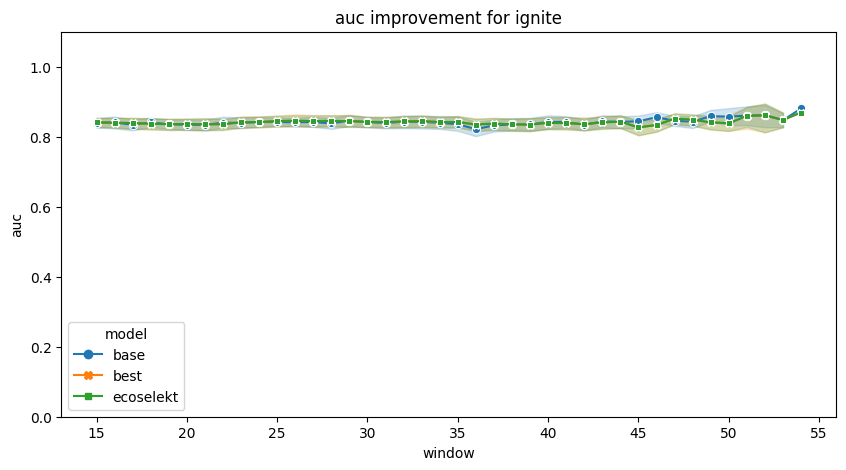

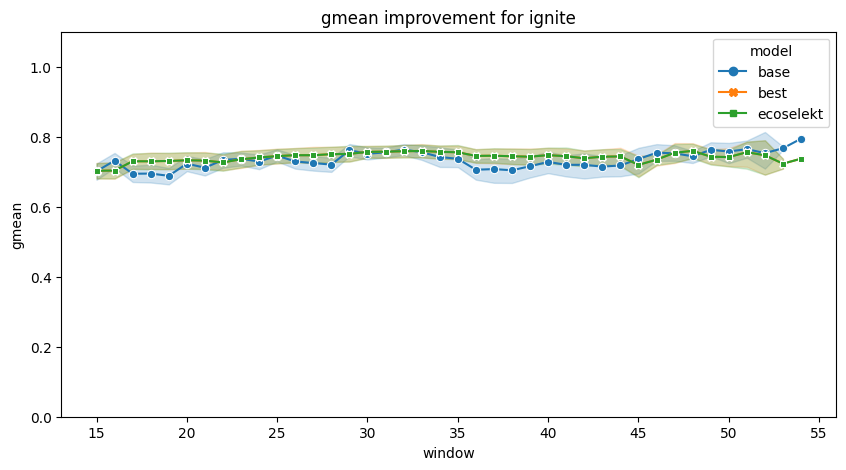

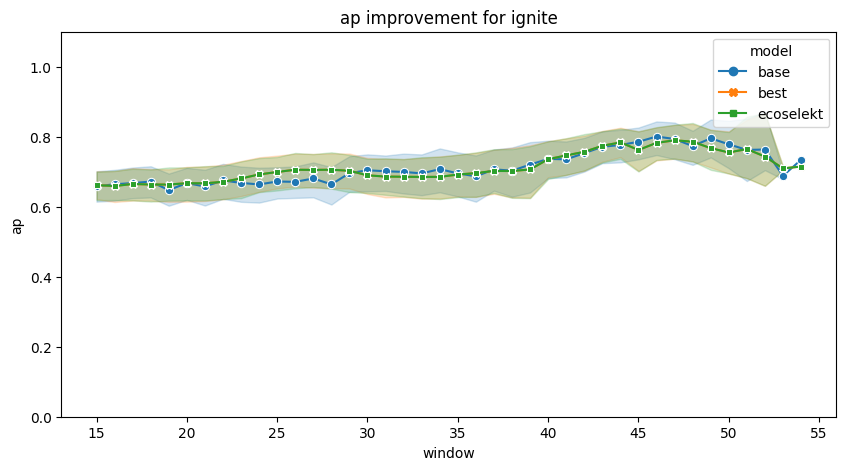

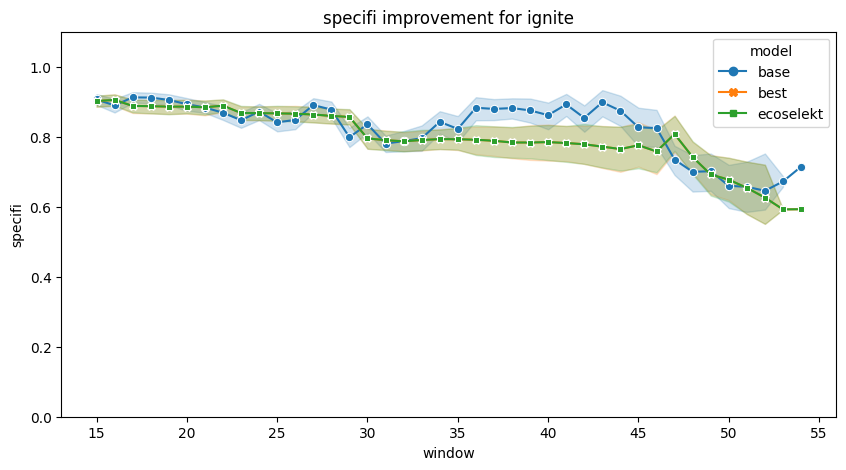

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.08415465162215696
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.1294704859537877
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(164000, 4)


,commit_id,window,test_split,model_version
0,0135a4cb089faa828c9797b80ac0570fffffc4ad,15,16,14
1,387c24dd8b87ba5b0dadb420247c0505ffcf1163,15,16,14
2,bdb5ded04b9c41f4dd552c63ba280ff09c769c84,15,16,14
3,e66c060ed6bcb4fe8a45790ecfb1476f1bc3b7b5,15,16,14
4,bd2ce38a73eb6fb3625684c3033eba28a2279968,15,16,14


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(164000, 4)


,commit_id,window,test_split,model_version
0,0135a4cb089faa828c9797b80ac0570fffffc4ad,15,16,15
1,01689b1d576e02179c34eb1126b41b341c40eb52,15,16,14
2,03890cc6fcd0f3c601d89ef97c16607a5dc61329,15,16,15
3,03c899224e19af3597652a64ea1a4c0075c8e74c,15,16,15
4,04927740bccae57ba6e9c9b440c18b8a191f9fa4,15,16,14


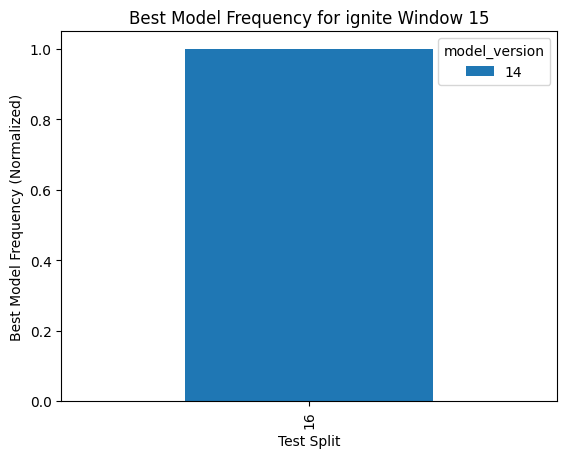

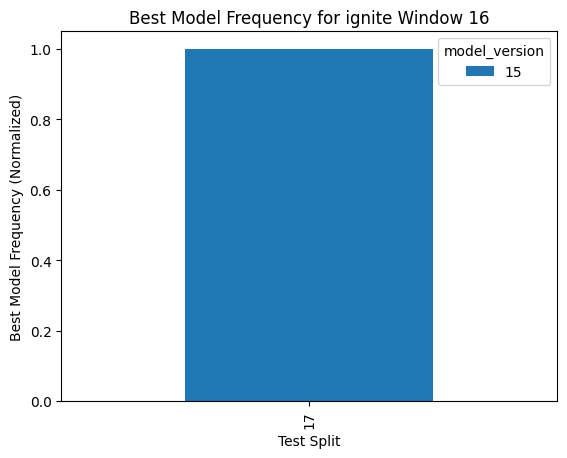

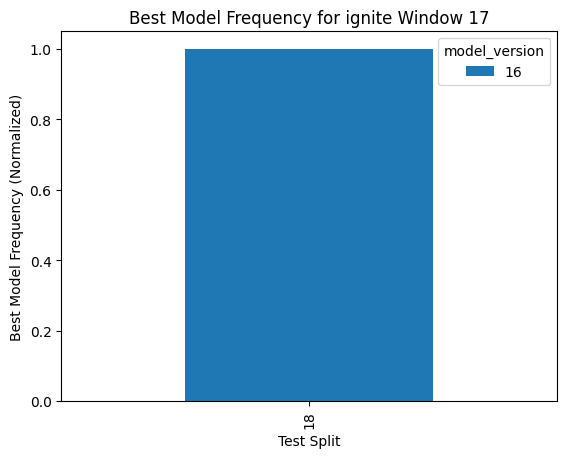

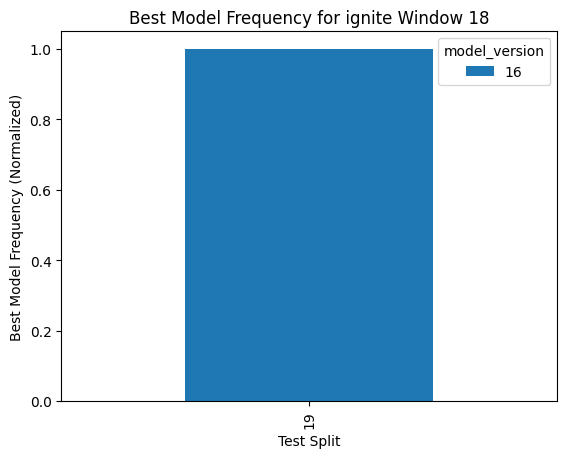

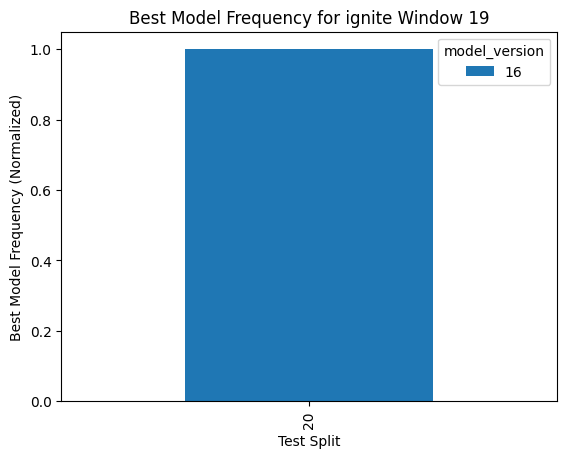

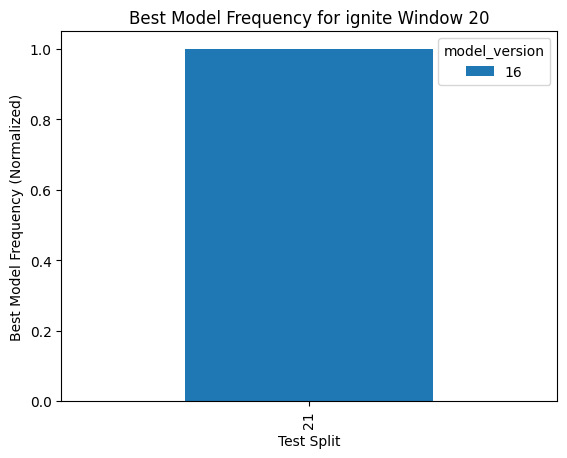

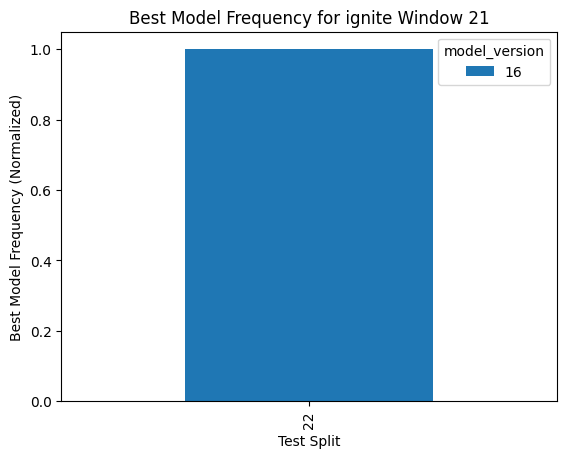

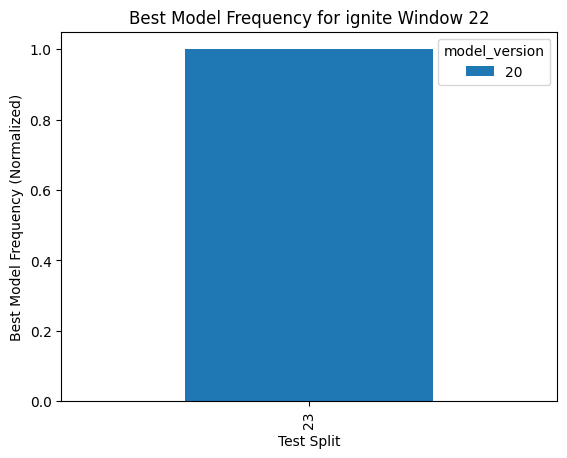

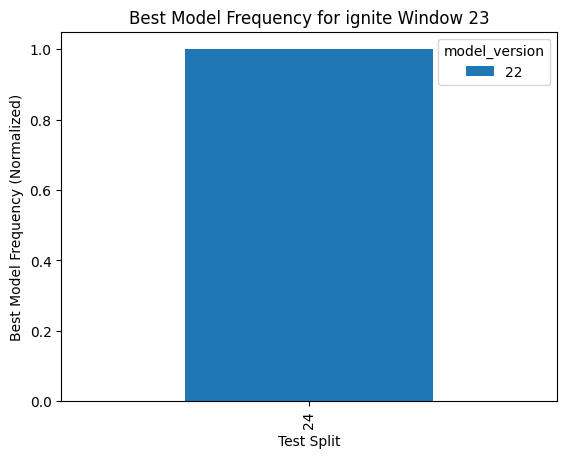

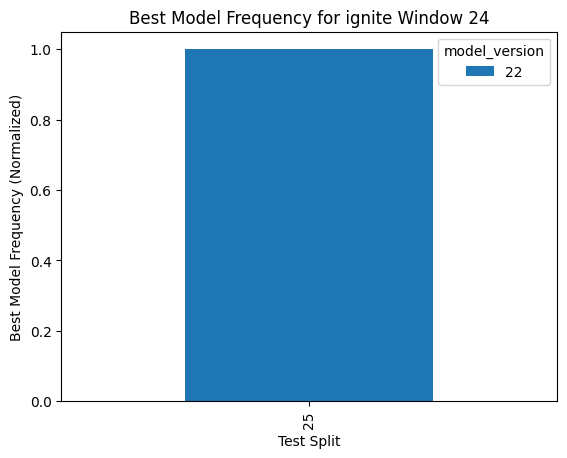

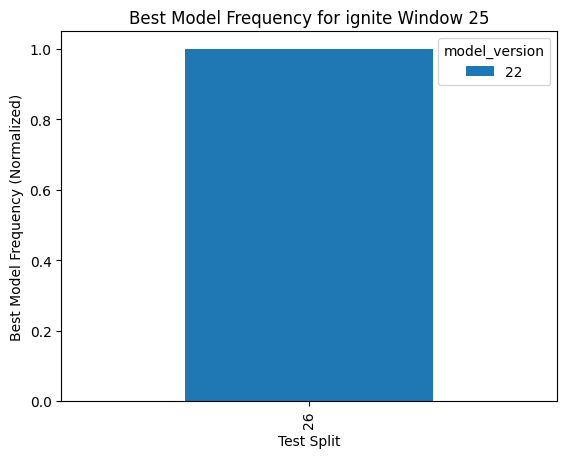

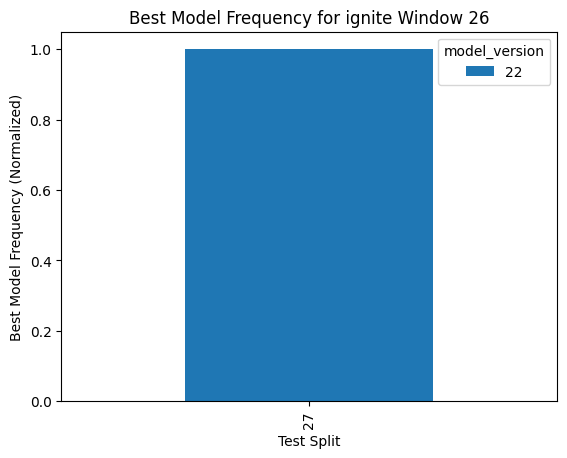

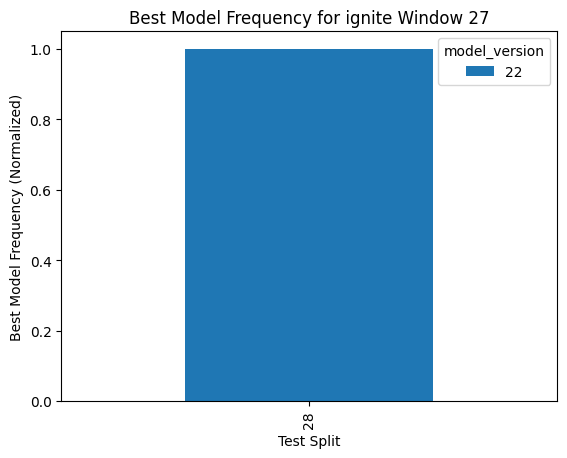

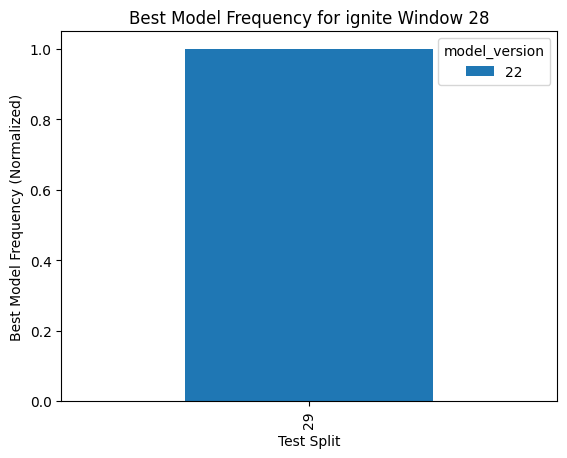

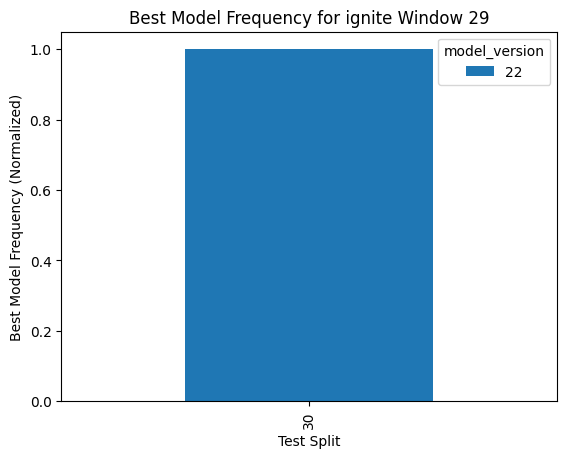

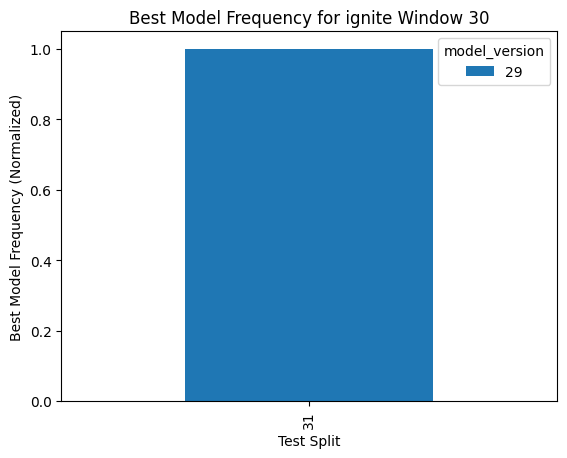

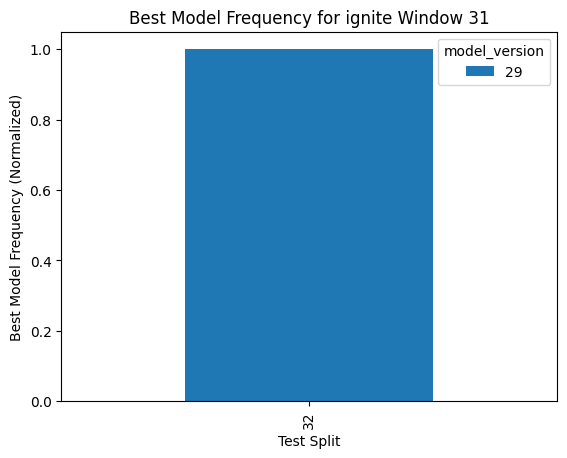

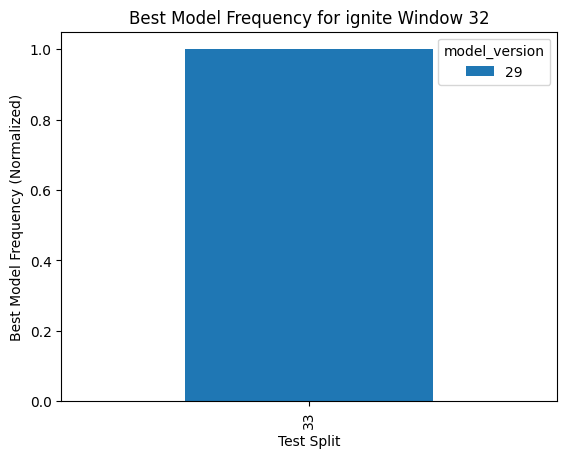

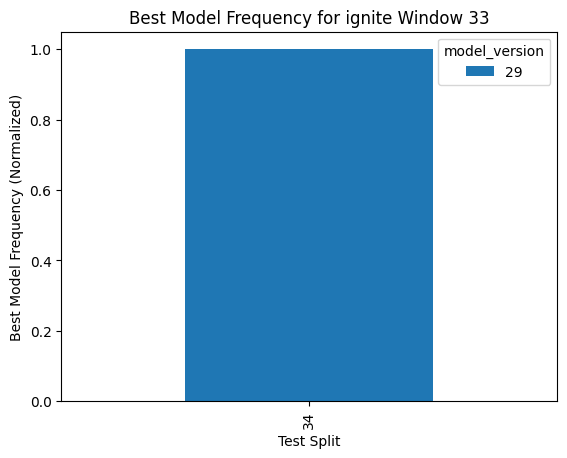

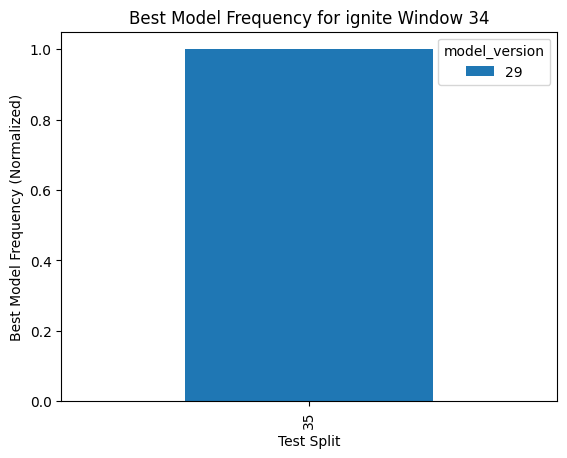

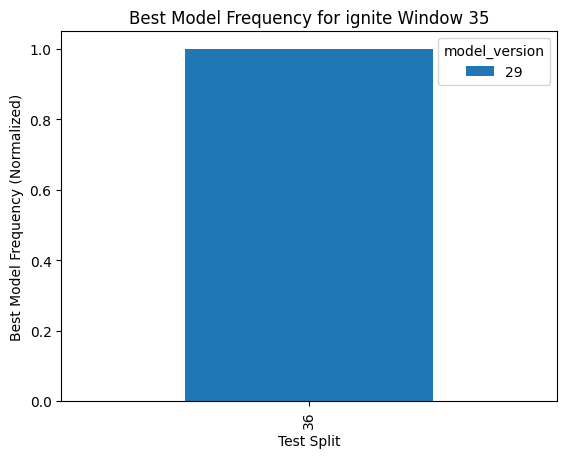

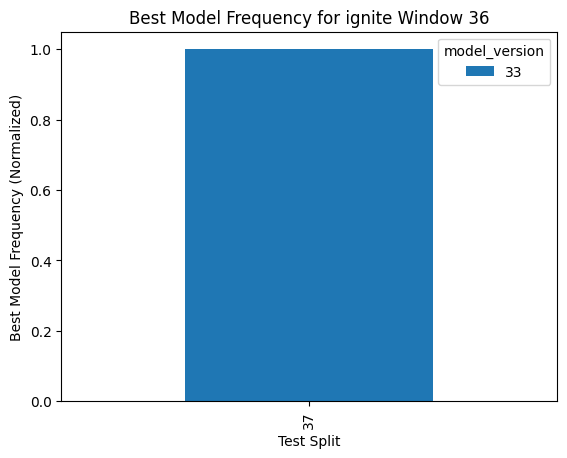

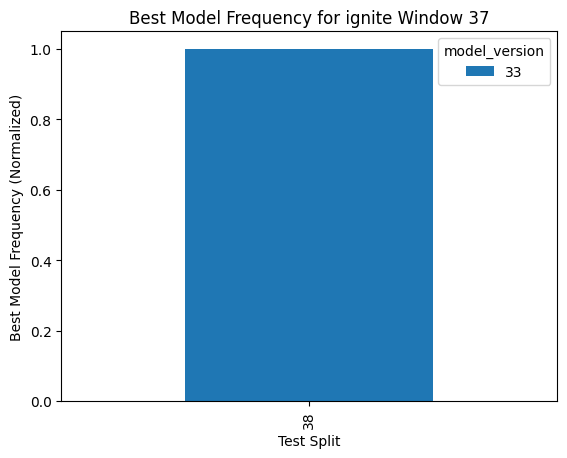

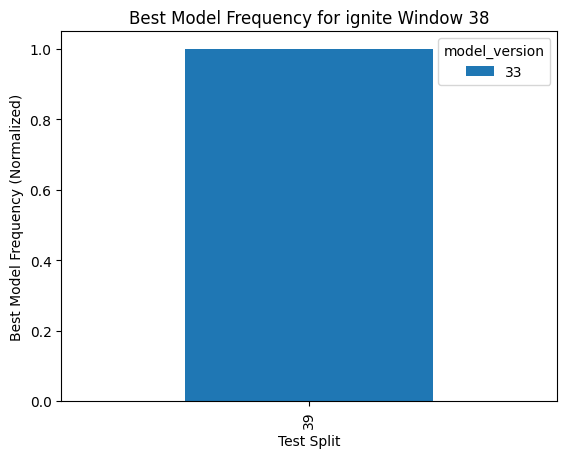

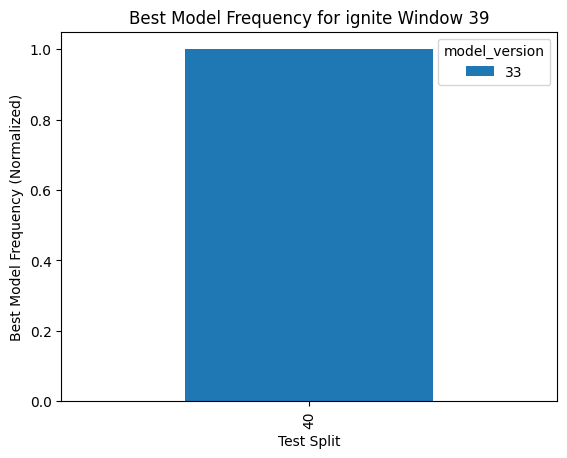

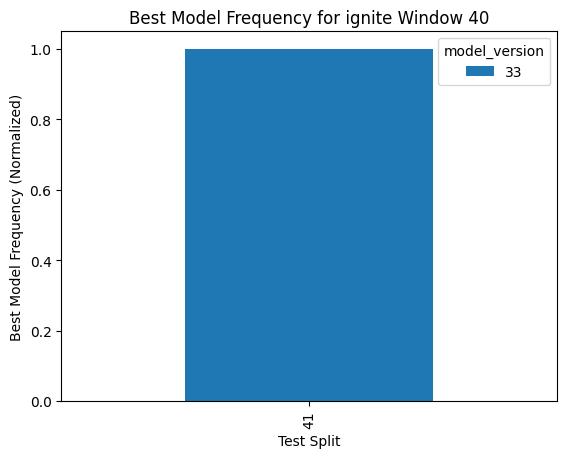

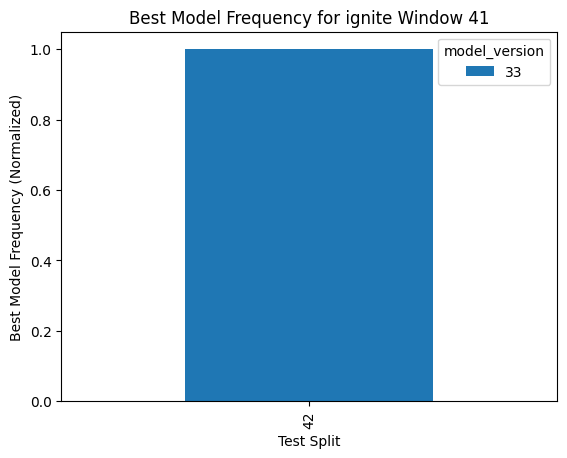

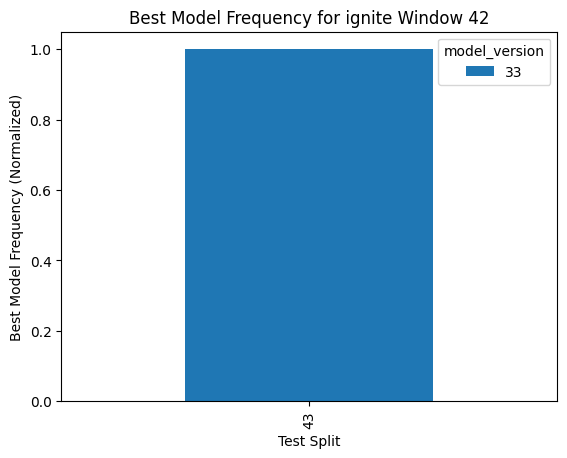

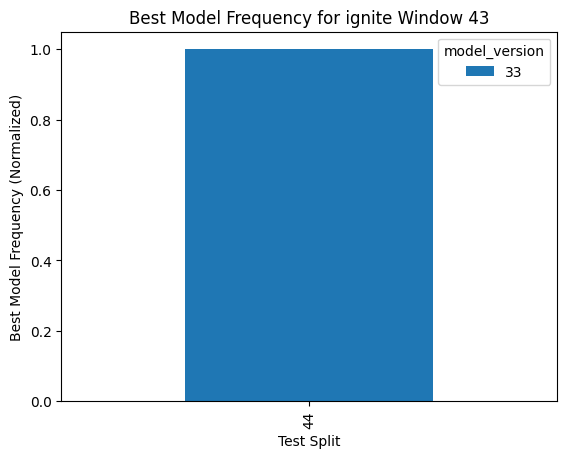

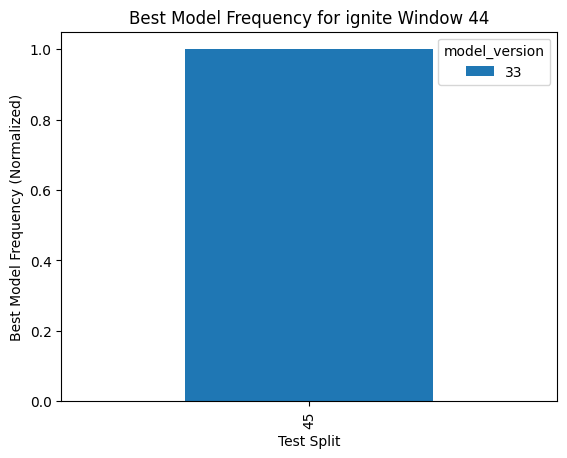

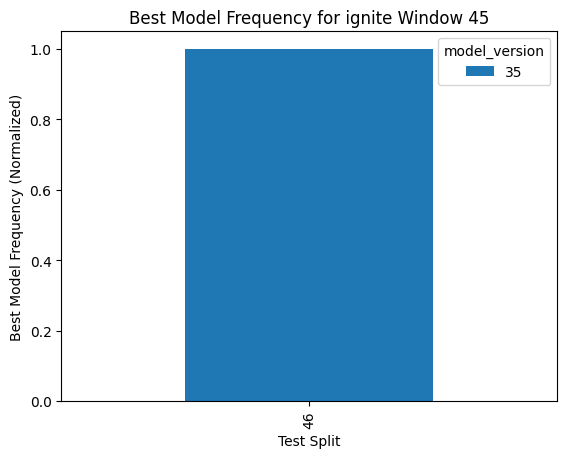

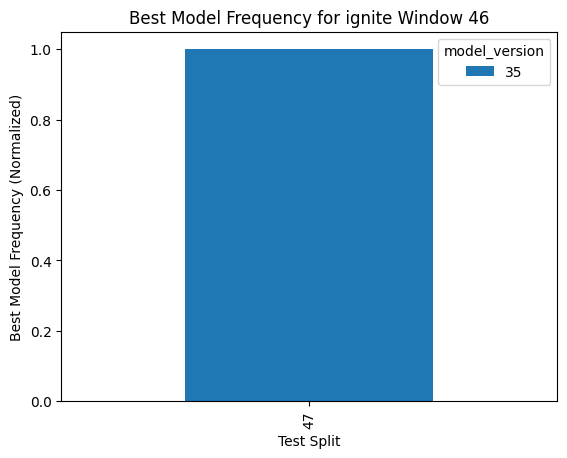

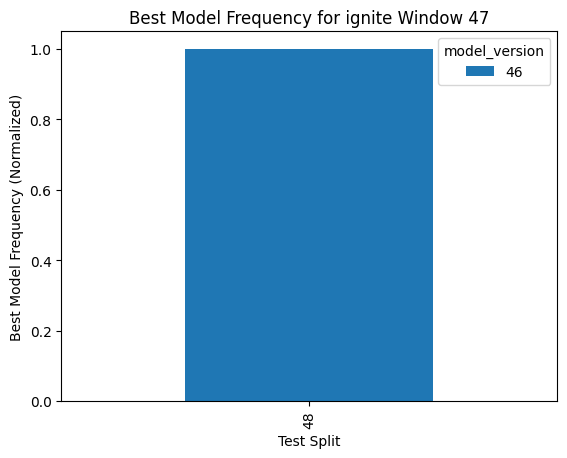

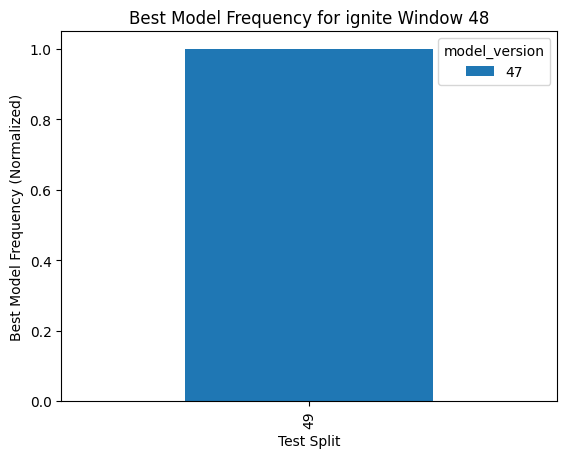

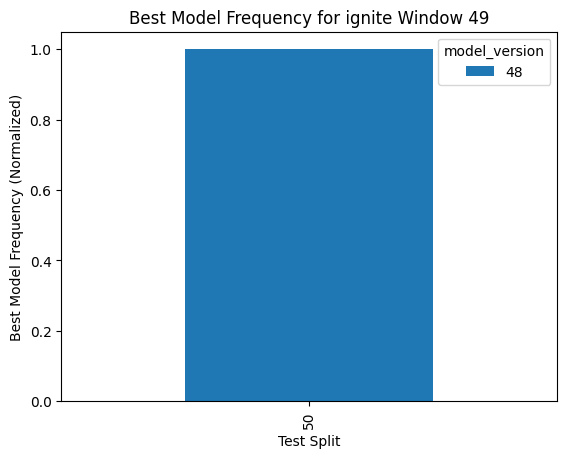

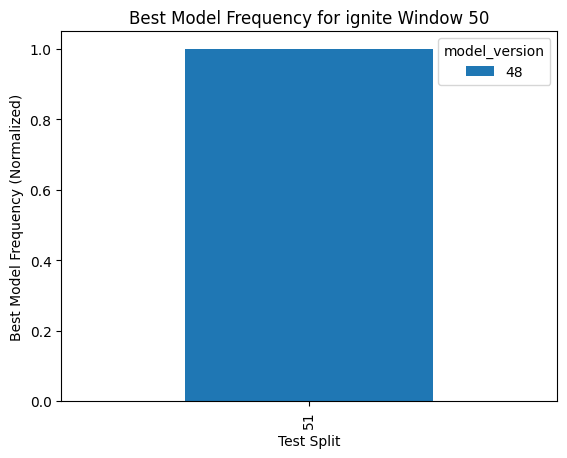

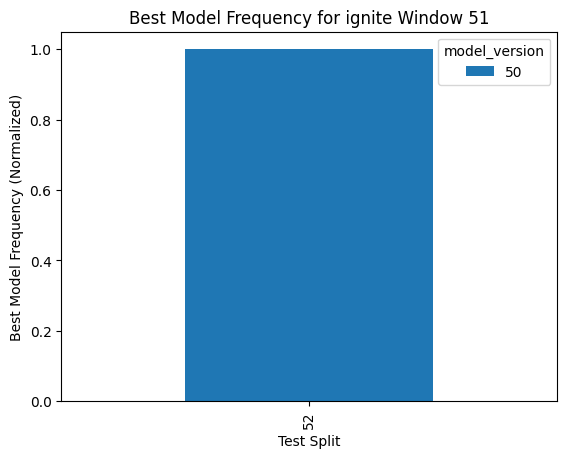

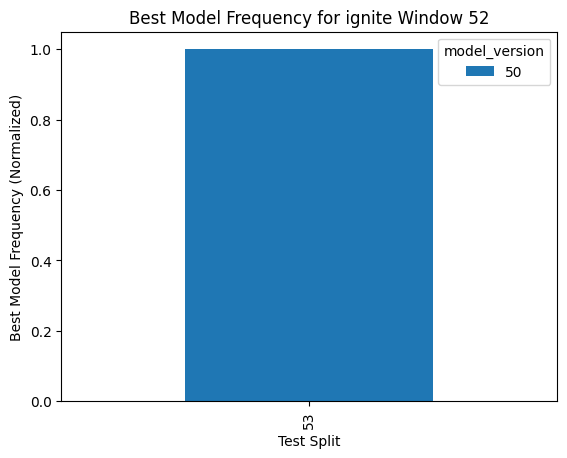

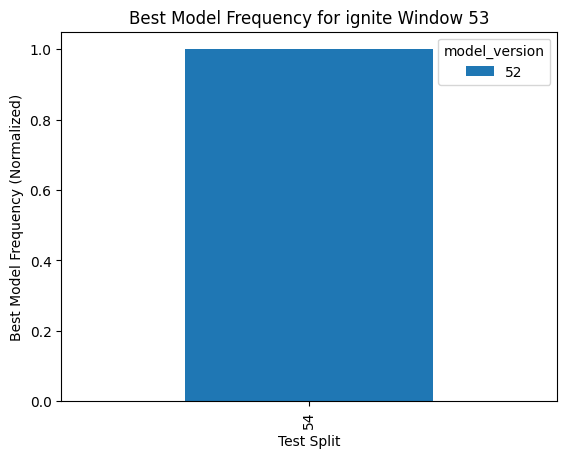

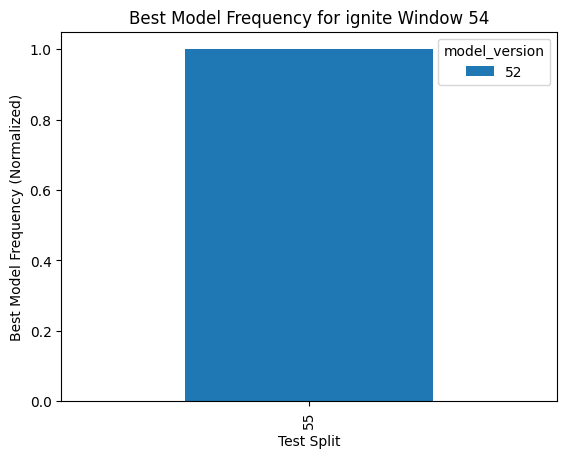

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")